In [1]:
p <- c("reshape2","ggplot2","pheatmap","combinat", "gridExtra",
       "cowplot", "UpSetR")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [2]:
setwd('./')
outpath<-getwd()

In [4]:
f<-read.table("../Output/skin_1975_by_site_sex_RF.reg_out/feature_imps_all.xls", sep="\t", header=TRUE)

In [5]:
head(f)

Feature.ID,hand_female,hand_male,head_female,head_male,Taxon,Confidence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
AACAGAGGATGCAAGCGTTATCCGGAATTATTGGGCGTAAAGTGTCTGTAGGTGGCTTTTCAAGTCCGTCGTCAAATCCCAGGGCTCAACCCTGGACAGG,0.0284905805,0.007354955,-0.003828601,0.003679112,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__,0.9999967
AACAGAGGCTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGTGTCTGTAGGTGGCTTTTCAAGTCCGTCGTCAAATCCCAGGGCTCAACCCTGGACAGG,0.0004971751,0.000000000,0.000000000,-0.018350183,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__,0.9999333
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTAAATTAAGTCAGGTGTGAAAGTTCGGGGCTCAACCCCGTGATTG,0.0019586953,-0.025809287,0.059010184,0.011097775,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,0.9999998
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTAACTTAAGTCAGGTGTGAAAGTTCGGGGCTCAACCCCGTGATTG,0.0000000000,NA,0.000000000,0.000000000,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,0.9999901
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTG,0.0012444278,-0.007335309,0.071738138,-0.014549941,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,0.9999978
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTTTATTAAGTCAGGTGTGAAAGTTCGGGGCTCAACCCCGTGATTG,0.0728471735,0.002659830,0.040170726,-0.005452259,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,0.9999990


In [6]:
rbind.na<-function(l){
    max_len<-max(unlist(lapply(l, length)))
    c_l<-lapply(l, function(x) {c(x, rep(NA, max_len - length(x)))})
    do.call(rbind, c_l)
}

In [7]:
taxa_df <- rbind.na(strsplit(as.character(f$Taxon), ';'))
colnames(taxa_df) <- c("kingdom", "phylum","class","order","family","genus","species")
head(taxa_df)

kingdom,phylum,class,order,family,genus,species
k__Bacteria,p__Cyanobacteria,c__Chloroplast,o__Streptophyta,f__,g__,s__
k__Bacteria,p__Cyanobacteria,c__Chloroplast,o__Streptophyta,f__,g__,s__
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__


In [8]:
expand_Taxon<-function(df, Taxon){
    taxa_df <- rbind.na(strsplit(as.character(df[, Taxon]), ';'))
    colnames(taxa_df) <- c("kingdom", "phylum","class","order","family","genus","species")
    data.frame(df, taxa_df)
}
f_ann<-expand_Taxon(f, "Taxon")

In [9]:
dim(f_ann)

[1] 6912   14

In [10]:
## test rank
rank(-c(1, 2, 34, -1, NA), , na.last = "keep")
rank(c(1, 2, 34, -1, NA), , na.last = "keep")

[1]  3  2  1  4 NA

[1]  2  3  4  1 NA

In [11]:
library("dplyr")
f_ann_m<-melt(f_ann, id.vars = c("Feature.ID", "Taxon", "kingdom", "phylum", "class", "order", "family", "genus", "species", "Confidence"),
              variable.name = "Dataset", value.name = "imp")
f_ann_m<- f_ann_m %>% dplyr::group_by(Dataset) %>% mutate(imp_rank=rank(-imp, na.last = "keep"))
dim(f_ann_m)
head(f_ann_m)


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] 27648    13

Feature.ID,Taxon,kingdom,phylum,class,order,family,genus,species,Confidence,Dataset,imp,imp_rank
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
AACAGAGGATGCAAGCGTTATCCGGAATTATTGGGCGTAAAGTGTCTGTAGGTGGCTTTTCAAGTCCGTCGTCAAATCCCAGGGCTCAACCCTGGACAGG,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__,k__Bacteria,p__Cyanobacteria,c__Chloroplast,o__Streptophyta,f__,g__,s__,0.9999967,hand_female,0.0284905805,451.0
AACAGAGGCTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGTGTCTGTAGGTGGCTTTTCAAGTCCGTCGTCAAATCCCAGGGCTCAACCCTGGACAGG,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__,k__Bacteria,p__Cyanobacteria,c__Chloroplast,o__Streptophyta,f__,g__,s__,0.9999333,hand_female,0.0004971751,1635.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTAAATTAAGTCAGGTGTGAAAGTTCGGGGCTCAACCCCGTGATTG,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__,0.9999998,hand_female,0.0019586953,1228.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTAACTTAAGTCAGGTGTGAAAGTTCGGGGCTCAACCCCGTGATTG,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__,0.9999901,hand_female,0.0000000000,3729.5
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTG,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__,0.9999978,hand_female,0.0012444278,1354.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTTTATTAAGTCAGGTGTGAAAGTTCGGGGCTCAACCCCGTGATTG,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptococcaceae,g__Peptococcus,s__,0.9999990,hand_female,0.0728471735,202.0


In [12]:
#detach("package:plyr", unload=TRUE)
# f_ann_m[c(1:5, 9001:9005), ] %>% arrange(imp, Dataset)%>% group_by(Dataset) %>% mutate(imp_rank=rank(-imp, na.last = "keep"))

In [13]:
sum(f_ann_m$imp_rank==1, na.rm = T)

[1] 4

Warning message:
“Removed 1021 rows containing missing values (geom_point).”

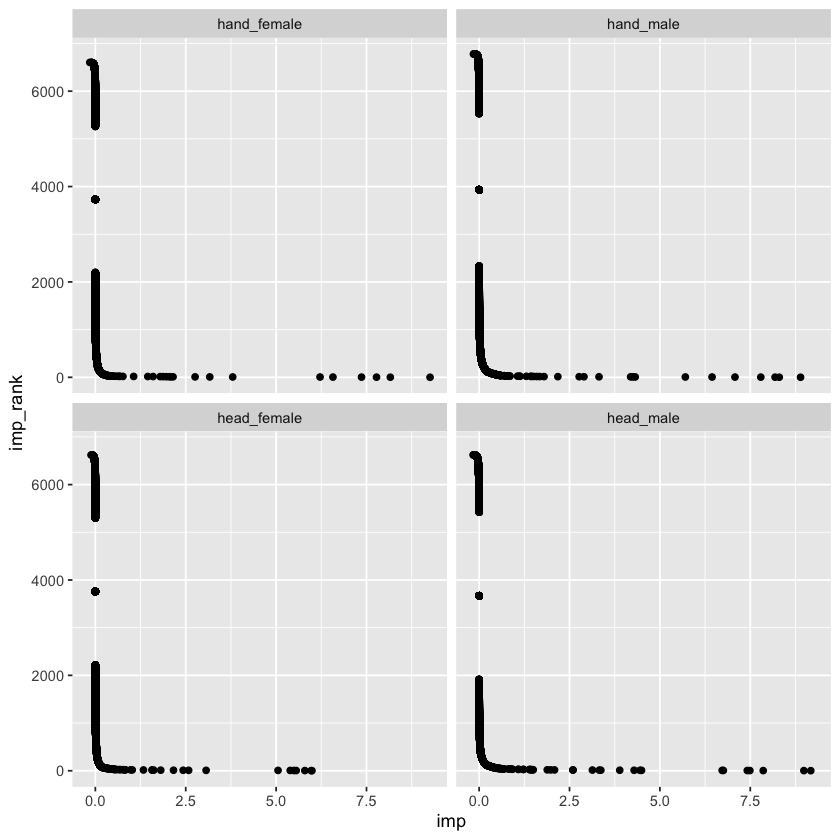

In [14]:
ggplot(f_ann_m, aes(x=imp, y=imp_rank))+geom_point()+facet_wrap(~Dataset)

### Order the Taxon (or genus) by sum of importance scores within the Taxonomy

In [15]:
f_ann_m$Taxon<-factor(f_ann_m$Taxon)

In [16]:
f_ann_m$genus<-factor(f_ann_m$genus)

In [17]:
dim(f_ann_m)

[1] 27648    13

### Imp socre visualization collapsed to sOTUs' Taxonomy

In [18]:
library(dplyr)
Taxon_df<- f_ann_m %>% 
  dplyr::group_by(Taxon, Dataset) %>% 
  dplyr::summarise(n=length(imp), n_NA=sum(is.na(imp)), n_neg=sum(imp<0, na.rm = T), n_pos=sum(imp>0, na.rm = T), 
                   imp_sum = sum(imp, na.rm = T), imp_mean=mean(imp, na.rm = T), 
                   imp_rank_sum= sum(imp_rank, na.rm = T), imp_rank_mean=mean(imp_rank, na.rm = T),
                   imp_rank_min= min(imp_rank, na.rm = T))
cat("# of sum values: ", dim(Taxon_df)[1], '\n')
cat("# of Taxa: ", length(levels(f_ann_m$Taxon)))
Taxon_asc_levels<-levels(f_ann_m$Taxon)[with(Taxon_df,  order(imp_sum))]
Taxon_desc_levels<-levels(f_ann_m$Taxon)[with(Taxon_df,  order(-imp_sum))]

Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments

“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”

# of sum values:  5360 
# of Taxa:  1340

In [19]:
head(Taxon_df)

Taxon,Dataset,n,n_NA,n_neg,n_pos,imp_sum,imp_mean,imp_rank_sum,imp_rank_mean,imp_rank_min
<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,hand_female,3,0,0,3,9.494504e-03,3.164835e-03,3882.0,1294.000,962
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,hand_male,3,0,1,2,-1.634511e-03,-5.448369e-04,9350.0,3116.667,1221
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,head_female,3,0,0,2,7.294029e-05,2.431343e-05,7869.5,2623.167,2030
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,head_male,3,0,0,1,5.199117e-04,1.733039e-04,8968.0,2989.333,1632
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,hand_female,8,0,0,2,7.296253e-03,9.120316e-04,24786.0,3098.250,897
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,hand_male,8,0,1,2,1.426013e-02,1.782516e-03,28253.0,3531.625,910


In [20]:
f_ann_m$Taxon<-factor(f_ann_m$Taxon,levels=Taxon_asc_levels, ordered=TRUE)
summary(f_ann_m$Taxon)

k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__ 
                                                                                                                      484 
                                k__Bacteria; p__Actinobacteria; c__Thermoleophilia; o__Solirubrobacterales; f__; g__; s__ 
                                                                                                                      360 
                       k__Bacteria; p__Bacteroidetes; c__[Saprospirae]; o__[Saprospirales]; f__Chitinophagaceae; g__; s__ 
                                                                                                                      352 
                    k__Bacteria; p__Bacteroidetes; c__Cytophagia; o__Cytophagales; f__Cytophagaceae; g__Hymenobacter; s__ 
                                                                                                                      328 
                  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__[Tissierellaceae]; g__Anaerococcus; s__ 
                                                                                                                      312 
                                          k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae 
                                                                                                                      284 
                        k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae 
                                                                                                                      280 
                                k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria 
                                                                                                                      248 
      k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__Flavobacteriaceae; g__Flavobacterium; s__ 
                                                                                                                      240 
                  k__Bacteria; p__Spirochaetes; c__Spirochaetes; o__Spirochaetales; f__Spirochaetaceae; g__Treponema; s__ 
                                                                                                                      220 
                             k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Comamonadaceae 
                                                                                                                      212 
                          k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae 
                                                                                                                      204 
                                           k__Bacteria; p__Chloroflexi; c__Thermomicrobia; o__JG30-KF-CM45; f__; g__; s__ 
                                                                                                                      200 
            k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__ 
                                                                                                                      200 
                                                   k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales 
                                                                                                                      184 
                 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__[Tissierellaceae]; g__Peptoniphilus; s__ 
                                                                                                                      176 
                              k__Bacteria; p__Actinobacteria; c__Thermoleophilia; o

## heatmap of imp rank across datasets

In [26]:
head(Taxon_df)

Taxon,Dataset,n,n_NA,n_neg,n_pos,imp_sum,imp_mean,imp_rank_sum,imp_rank_mean,imp_rank_min
<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,hand_female,3,0,0,3,9.494504e-03,3.164835e-03,3882.0,1294.000,962
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,hand_male,3,0,1,2,-1.634511e-03,-5.448369e-04,9350.0,3116.667,1221
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,head_female,3,0,0,2,7.294029e-05,2.431343e-05,7869.5,2623.167,2030
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera,head_male,3,0,0,1,5.199117e-04,1.733039e-04,8968.0,2989.333,1632
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,hand_female,8,0,0,2,7.296253e-03,9.120316e-04,24786.0,3098.250,897
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,hand_male,8,0,1,2,1.426013e-02,1.782516e-03,28253.0,3531.625,910


In [43]:
levels(Taxon_df$Dataset)
levels(Taxon_df$Dataset)<-c("Women hand","Men hand","Women head","Men head")
levels(Taxon_df$Dataset)

[1] "Women's hand" "Men's hand"   "Women's head" "Men's head"

[1] "Women hand" "Men hand"   "Women head" "Men head"

### We visualized the imp rank of top-64 features with taxonomy annotations (such as species)

In [44]:
Taxon_df_top64<-subset(Taxon_df, imp_rank_min<64)
Taxon_df_top64_acast<-acast(Taxon_df_top64, Taxon~Dataset, value.var="imp_rank_min")
row_sum<-rowSums(Taxon_df_top64_acast, na.rm = T)
NA_perc<-rowSums(is.na(Taxon_df_top64_acast))/ncol(Taxon_df_top64_acast)
NA_perc_idx<-which(NA_perc<=0.5); taxa_kept<-names(NA_perc)[NA_perc_idx]
row_peudosum4NA<-rowMeans(Taxon_df_top64_acast, na.rm = T)*apply(Taxon_df_top64_acast, 1, function(x) sum(is.na(x)))
row_sum_comb<-row_sum+row_peudosum4NA
ord<-order(row_sum_comb, decreasing = F)
Taxon_df_top64$Taxon<-factor(Taxon_df_top64$Taxon,levels=rownames(Taxon_df_top64_acast)[ord], ordered=TRUE)

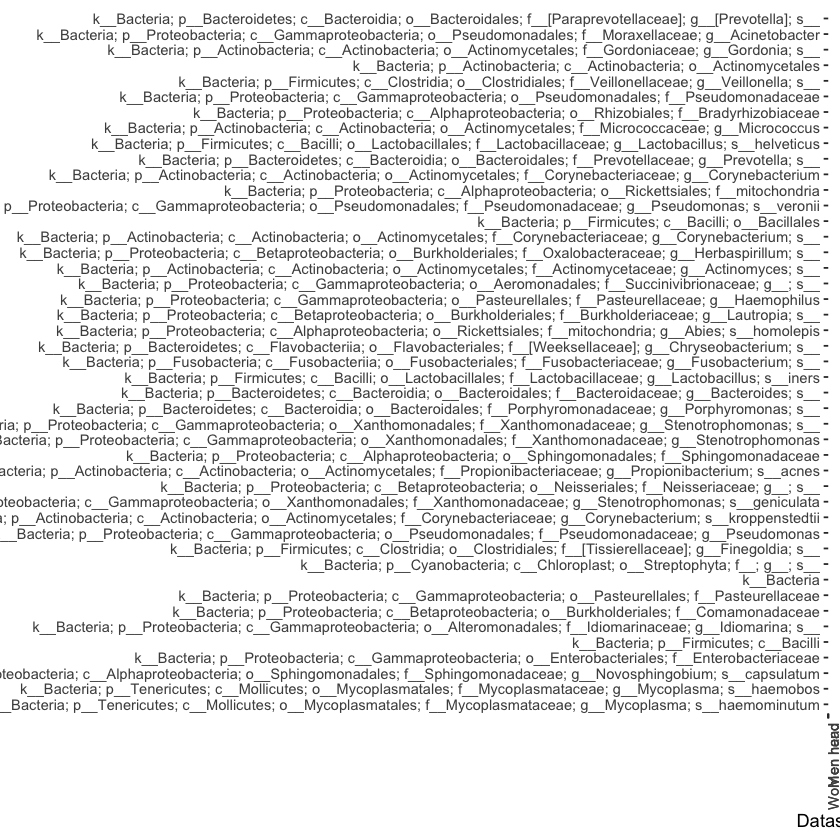

In [45]:
p<-ggplot(subset(Taxon_df_top64, Taxon %in% taxa_kept), aes(Dataset, Taxon) ) +
  geom_tile(data=subset(Taxon_df_top64, Taxon %in% taxa_kept), na.rm = FALSE, aes(fill = imp_rank_min), colour = 'white') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank_min, 1)), color='white') +
  #scale_y_discrete(label=f_ann_m$Taxon)+
  scale_fill_continuous(type = "viridis", na.value = 'white')+
  labs(fill="Feature ranking")+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))
p
#ggsave(filename=paste(outpath,"/skin_Top64_min_imp_rank_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=11, height=10)
ggsave(filename=paste(outpath,"/Figure_S4.eps",sep=""),plot=p, device="eps", width=11, height=10)


In [52]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.5

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] dplyr_0.8.1         UpSetR_1.4.0        pROC_1.13.0        
 [4] cowplot_0.9.4       doMC_1.3.5          iterators_1.0.10   
 [7] foreach_1.4.4       biomformat_1.10.0   vegan_2.5-4        
[10] lattice_0.20-35     permute_0.9-4       gridExtra_2.3      
[13] randomForest_4.6-14 combinat_0.0-8      pheatmap_1.0.12    
[16] ggplot2_3.0.0       reshape2_1.4.3     

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.5   repr_0.15.0        purrr_0.2.5       
 [5] rhdf5_2.26.2       colorspace_1.3-2   viridisLite_0.3.0  htmltools_0.3.6   
 [9] 